<a href="https://colab.research.google.com/github/D6342/D1978/blob/main/P8_Write_a_program_to_develop_Autoencoders_using_MNIST_Handwritten_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
encoding_dim=32
#this is our input image
input_img=keras.Input(shape=(784,))
#"encoded" is the encoded representation of the input
encoded=layers.Dense(encoding_dim, activation='relu')(input_img)
#"decoded" is the lossy reconstruction of the input
decoded=layers.Dense(784, activation='sigmoid')(encoded)
#creating autoencoder model
autoencoder=keras.Model(input_img,decoded)
#create the encoder model
encoder=keras.Model(input_img,encoded)
encoded_input=keras.Input(shape=(encoding_dim,))
#Retrive the last layer of the autoencoder model
decoder_layer=autoencoder.layers[-1]
#create the decoder model
decoder=keras.Model(encoded_input,decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
#scale and make train and test dataset
(X_train,_),(X_test,_)=mnist.load_data()
X_train=X_train.astype('float32')/255.
X_test=X_test.astype('float32')/255.
X_train=X_train.reshape((len(X_train),np.prod(X_train.shape[1:])))
X_test=X_test.reshape((len(X_test),np.prod(X_test.shape[1:])))
print(X_train.shape)
print(X_test.shape)
#train autoencoder with training dataset
autoencoder.fit(X_train,X_train,
 epochs=50,
 batch_size=256,
 shuffle=True,
 validation_data=(X_test,X_test))
encoded_imgs=encoder.predict(X_test)
decoded_imgs=decoder.predict(encoded_imgs)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 784)
(10000, 784)
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - loss: 0.3774 - val_loss: 0.1860
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1772 - val_loss: 0.1524
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1486 - val_loss: 0.1332
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1313 - val_loss: 0.1214
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.1204 - val_loss: 0.1131
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.1132 - val_loss: 0.1075
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.1077 - val_loss: 0.1033
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1037 - val_loss: 0.1000
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1004 - val_loss: 0.0975
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0982 - val_loss: 0.0957
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/ste

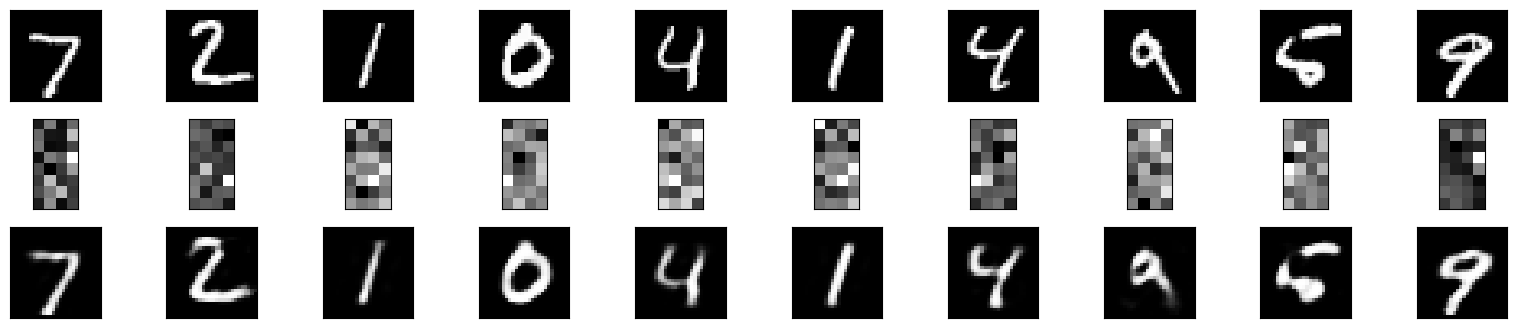

In [ ]:
import matplotlib.pyplot as plt
n = 10 # How many digits we will display
plt.figure(figsize=(40, 4))
for i in range(10):
 # display original
 ax = plt.subplot(3, 20, i + 1)
 plt.imshow(X_test[i].reshape(28, 28))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
 # display encoded image
 ax = plt.subplot(3, 20, i + 1 + 20)
 plt.imshow(encoded_imgs[i].reshape(8,4))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
 # display reconstruction
 ax = plt.subplot(3, 20, 2*20 +i+ 1)
 plt.imshow(decoded_imgs[i].reshape(28, 28))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
plt.show()
